In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def setLocation(row):
    tmp = row['Location 1']
    try:
        pos = tmp.find('{"address": "')
    except:
        return ""
    end = tmp.find('"',pos+13)
    return tmp[pos+13:end]

In [3]:
#导入数据及合并
#该数据集包括多个年份的数据，将这些数据导入后合并
data_2011 = pd.read_csv('oakland-crime-statistics-2011-to-2016/records-for-2011.csv')
data_2012 = pd.read_csv('oakland-crime-statistics-2011-to-2016/records-for-2012.csv')
data_2013 = pd.read_csv('oakland-crime-statistics-2011-to-2016/records-for-2013.csv')
data_2014 = pd.read_csv('oakland-crime-statistics-2011-to-2016/records-for-2014.csv')
data_2015 = pd.read_csv('oakland-crime-statistics-2011-to-2016/records-for-2015.csv')
data_2016 = pd.read_csv('oakland-crime-statistics-2011-to-2016/records-for-2016.csv')

##处理2012、2014Location字段，提取地点字符串，与其他年份化成同格式数据
data_2012['Location'] = ""
data_2012['Location']=data_2012.apply(lambda r:setLocation(r),axis=1)
data_2012.drop('Location 1',axis=1, inplace=True)
data_2012.drop('Zip Codes',axis=1, inplace=True)

data_2014['Location'] = ""
data_2014['Location']=data_2014.apply(lambda r:setLocation(r),axis=1)
data_2014.drop('Location 1',axis=1, inplace=True)
data_2014.drop('Zip Codes',axis=1, inplace=True)


data = pd.concat([data_2011,data_2012,data_2013,data_2014,data_2015,data_2016],sort=True)
print('数据行数:'+str(data.shape[0]))
print('数据列数:'+str(data.shape[1]))
print("每个变量数据类型:")
print(data.dtypes)
print("数据前五行:")
data.head()

数据行数:1046387
数据列数:10
每个变量数据类型:
Agency                        object
Area Id                       object
Beat                          object
Closed Time                   object
Create Time                   object
Event Number                  object
Incident Type Description     object
Incident Type Id              object
Location                      object
Priority                     float64
dtype: object
数据前五行:


,Agency,Area Id,Beat,Closed Time,Create Time,Event Number,Incident Type Description,Incident Type Id,Location,Priority
0,OP,1,06X,2011-01-01T00:28:17.000,2011-01-01T00:00:00.000,LOP110101000001,POSSIBLE DEAD PERSON,PDOA,ST&SAN PABLO AV,1.0
1,OP,1,07X,2011-01-01T01:12:56.000,2011-01-01T00:01:11.000,LOP110101000002,415 GUNSHOTS,415GS,ST&HANNAH ST,1.0
2,OP,1,10Y,2011-01-01T00:07:20.000,2011-01-01T00:01:25.000,LOP110101000003,415 GUNSHOTS,415GS,ST&MARKET ST,2.0
3,OP,2,21Y,2011-01-01T00:02:28.000,2011-01-01T00:01:35.000,LOP110101000005,415 GUNSHOTS,415GS,PRENTISS ST,2.0
4,OP,2,20X,2011-01-01T00:50:04.000,2011-01-01T00:02:10.000,LOP110101000004,415 GUNSHOTS,415GS,AV&FOOTHILL BLVD,1.0


In [4]:
def removeBlank(row):
    tmp = row['Location']
    return tmp.strip()
data['Location']=data.apply(lambda r:removeBlank(r),axis=1)

In [5]:
##数据摘要
##标称属性：Agency;Area Id;Beat;Priority;Incident Type Id;Incident Type Description;Location
features_n = ['Agency','Area Id','Beat','Incident Type Id','Incident Type Description','Location']
print('标称属性有：'+str(features_n))
print('(每种属性展示其频数最高前十种聚会)')
for fea in features_n: 
    fea_value = data[fea].value_counts()
    print(fea+": 共有"+str(len(fea_value))+"种聚会")
    print(""+str(fea_value[0:min(10,len(fea_value))]))
fea_value = data['Priority'].value_counts()
print("Priority: 共有"+str(len(fea_value))+"种聚会")
print(str(fea_value))

标称属性有：['Agency', 'Area Id', 'Beat', 'Incident Type Id', 'Incident Type Description', 'Location']
(每种属性展示其频数最高前十种聚会)
Agency: 共有1种聚会
OP    1046384
Name: Agency, dtype: int64
Area Id: 共有13种聚会
1.0    290452
2.0    236700
P3     129054
P1     114560
P2      53033
3.0     32907
POU      5960
PCW       789
5.0       320
4.0       236
Name: Area Id, dtype: int64
Beat: 共有58种聚会
04X    43626
08X    38097
30Y    30880
26Y    30377
30X    29881
23X    29684
19X    29633
34X    27591
06X    27148
03X    25587
Name: Beat, dtype: int64
Incident Type Id: 共有288种聚会
933R     98497
SECCK    70965
415      66720
911H     54935
10851    47958
5150     37218
415C     33470
242      30636
912      26984
243E     23964
Name: Incident Type Id, dtype: int64
Incident Type Description: 共有288种聚会
ALARM-RINGER            98497
SECURITY CHECK          70965
911 HANG-UP             54935
STOLEN VEHICLE          47958
DISTURBING THE PEACE    38257
MENTALLY ILL            37218
415 UNKNOWN             33470
BATTERY       

<BarContainer object of 13 artists>

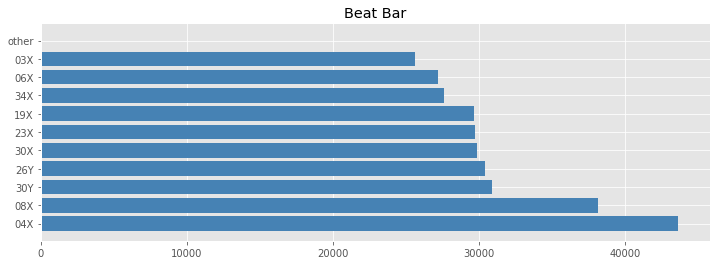

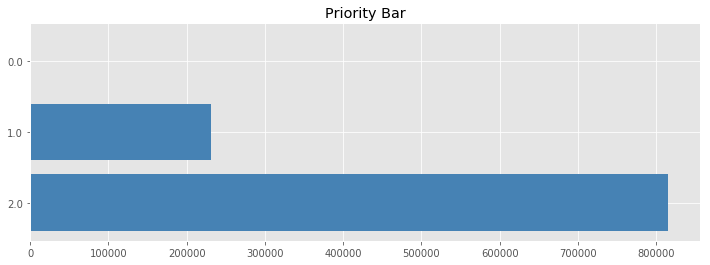

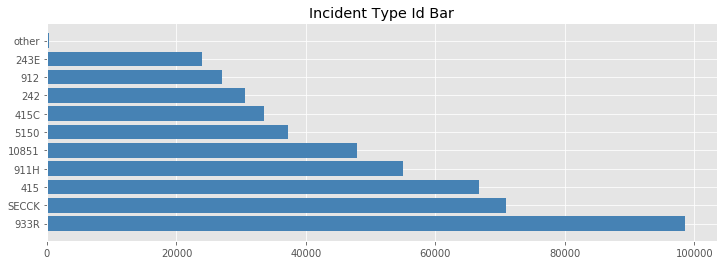

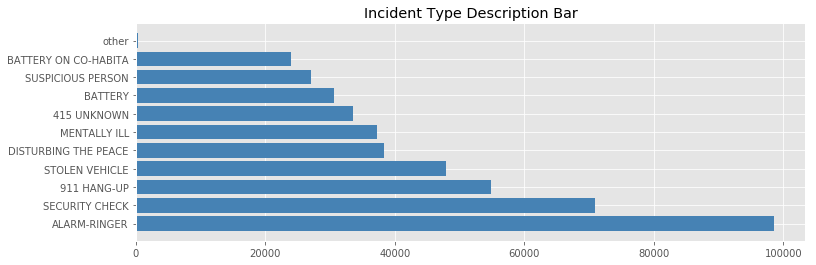

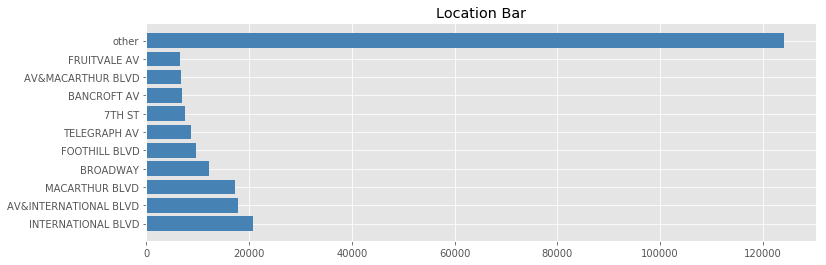

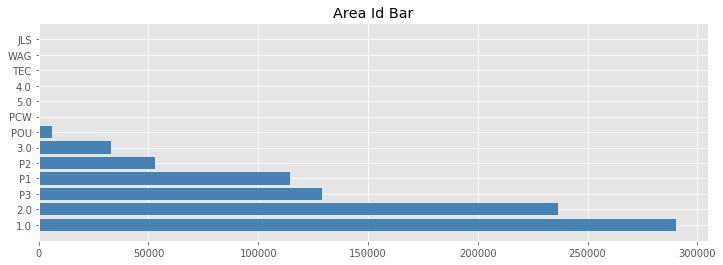

In [6]:
#绘制标称属性条形图
features_n = ['Beat','Priority','Incident Type Id','Incident Type Description','Location']
for fea in features_n:
    plt.figure(figsize=(12,4))
    plt.style.use('ggplot')
    fea_c = data[fea].value_counts()
    count = 0
    sum = 0
    show = {}
    if len(fea_c.index) > 10:
        for it in fea_c.index:
            count += 1
            if count <= 10:
                show[it] = fea_c[it]
            else:
                sum += 1
        show['other'] = sum
    else:
        show = dict(fea_c)
    plt.title(fea+' Bar')
    plt.barh(y = range(len(show)),width = list(show.values()),tick_label = list(show.keys()),
             color = 'steelblue',height = 0.8 )
plt.figure(figsize=(12,4))
plt.style.use('ggplot')
fea_c = data['Area Id'].value_counts()
plt.title('Area Id Bar')
plt.barh(y = range(len(fea_c)), width = list(fea_c.values), 
    tick_label = list(fea_c.keys()), color = 'steelblue', height = 0.8)

In [7]:
##查看有缺失值的特征
data = data.dropna(axis=0, how='any', thresh=None, subset=['Event Number'], inplace=False)##部分数据所有属性均为空，删除
data.isnull().any()  
##Area Id;Beat;Closed Time;Incident Type Description含有缺失值

Agency                       False
Area Id                       True
Beat                          True
Closed Time                   True
Create Time                  False
Event Number                 False
Incident Type Description     True
Incident Type Id             False
Location                     False
Priority                     False
dtype: bool

In [8]:
#对每个含有缺失值的属性进行查看和分析
#1.Area Id;
print("Area Id属性缺失个数："+str(len(data[data['Area Id'].isnull()])))
data[data['Area Id'].isnull()].head() ##查看缺失数据

Area Id属性缺失个数：182361


,Agency,Area Id,Beat,Closed Time,Create Time,Event Number,Incident Type Description,Incident Type Id,Location,Priority
1187,OP,NaN,24X,2011-01-05T12:53:14.000,2011-01-03T17:15:01.000,LOP110103000770,CRUELTY TO ANIMAL,597,35TH AV,2.0
1933,OP,NaN,32X,2011-01-06T16:51:02.000,2011-01-05T12:36:25.000,LOP110105000481,INJURIED ANIMAL,955,98TH AV,2.0
4227,OP,NaN,24X,2011-01-12T09:30:04.000,2011-01-10T14:20:18.000,LOP110110000596,CRUELTY TO ANIMAL,597,41ST AV,2.0
4522,OP,NaN,35X,2011-01-16T15:48:27.000,2011-01-11T06:04:34.000,LOP110111000173,INJURIED ANIMAL,955,AV&IRIS ST,2.0
4567,OP,NaN,33X,2011-01-12T13:50:29.000,2011-01-11T09:42:12.000,LOP110111000319,VICIOUS ANIMAL,955A,83RD AV,2.0


In [9]:
#2.Beat;
print("Beat属性缺失个数："+str(len(data[data['Beat'].isnull()])))
data[data['Beat'].isnull()].head() ##查看缺失数据

Beat属性缺失个数：5801


,Agency,Area Id,Beat,Closed Time,Create Time,Event Number,Incident Type Description,Incident Type Id,Location,Priority
84,OP,3,NaN,2011-01-01T02:37:16.000,2011-01-01T02:00:57.000,LOP110101000152,FIGHT,943,FOOTHILL WAY,1.0
655,OP,3,NaN,2011-01-02T18:04:28.000,2011-01-02T13:00:09.000,LOP110102000361,SEXUAL ASSAULT; RAPE,261,CALAROGA,2.0
727,OP,3,NaN,2011-01-02T16:31:28.000,2011-01-02T16:31:01.000,LOP110102000498,BATTERY,242,HOSP,1.0
2118,OP,3,NaN,2011-01-05T20:28:52.000,2011-01-05T19:10:11.000,LOP110105000898,BATTERY,242,DUBLIN,1.0
3083,OP,3,NaN,2011-01-07T23:06:08.000,2011-01-07T23:05:19.000,LOP110107000936,MISCELLANEOUS/UNKNOW,900,PD,2.0


In [10]:
#3.Closed Time
print("Closed Time属性缺失个数："+str(len(data[data['Closed Time'].isnull()])))
data[data['Closed Time'].isnull()].head() ##查看缺失数据

Closed Time属性缺失个数：25


,Agency,Area Id,Beat,Closed Time,Create Time,Event Number,Incident Type Description,Incident Type Id,Location,Priority
153870,OP,1,01X,NaN,2011-11-05T23:50:42.000,LOP111105000928,DISTURBANCE-DRINKERS,415,47TH EMBARCADERO WEST,2.0
153890,OP,1,12Y,NaN,2011-11-06T00:51:23.000,LOP111106000032,SECURITY CHECK,SECCK,47TH OAK GROVE AV,2.0
153903,OP,2,35Y,NaN,2011-11-06T01:23:47.000,LOP111106000048,SUSPICIOUS VEHICLE,949,47TH AV&SANFORD ST,1.0
153906,OP,1,14Y,NaN,2011-11-06T01:34:32.000,LOP111106000050,BATTERY,242,47TH GRAND AV,1.0
153908,OP,1,02Y,NaN,2011-11-06T01:36:53.000,LOP111106000052,MENTALLY ILL,5150,47TH ST&WOOD ST,1.0


In [11]:
#3.Incident Type Description
print("Incident Type Description属性缺失个数："+str(len(data[data['Incident Type Description'].isnull()])))
data[data['Incident Type Description'].isnull()].head() ##查看缺失数据

Incident Type Description属性缺失个数：388


,Agency,Area Id,Beat,Closed Time,Create Time,Event Number,Incident Type Description,Incident Type Id,Location,Priority
178947,OP,NaN,35Y,2013-12-12T17:53:35.000,2013-12-12T13:14:55.000,LOP131212000533,NaN,JGP,EB FAIRMONT DR,1.0
185820,OP,NaN,35Y,2013-12-27T02:41:12.000,2013-12-27T00:55:49.000,LOP131227000033,NaN,JGP,NB FAIRMONT DR,2.0
186584,OP,NaN,35Y,2013-12-28T21:02:45.000,2013-12-28T18:45:00.000,LOP131228000684,NaN,JGP,SAN FAIRMONT DR,2.0
187409,OP,NaN,35Y,2013-12-30T17:54:17.000,2013-12-30T14:56:50.000,LOP131230000586,NaN,JGP,W FAIRMONT DR,2.0
2382,OP,NaN,35Y,2014-01-05T21:34:41.000,2014-01-05T19:11:14.000,LOP140105000711,NaN,JGP,FAIRMONT DR,2.0


In [12]:
##缺失值处理方法一：将缺失部分剔除
data1 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print('处理后数据行数:'+str(data1.shape[0]))
##分析：可以看出剔除有缺失值的样本后，大部分样本都会被剔除，所以这种处理方法不理想。

处理后数据行数:859881


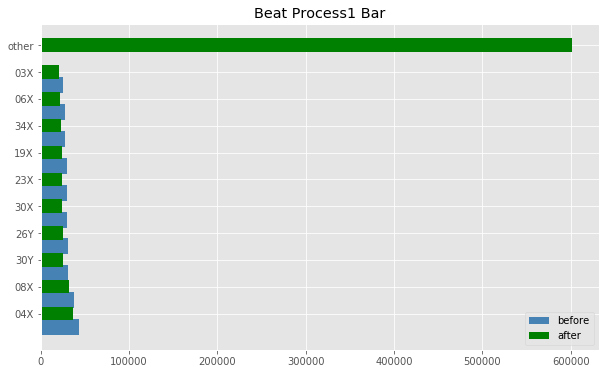

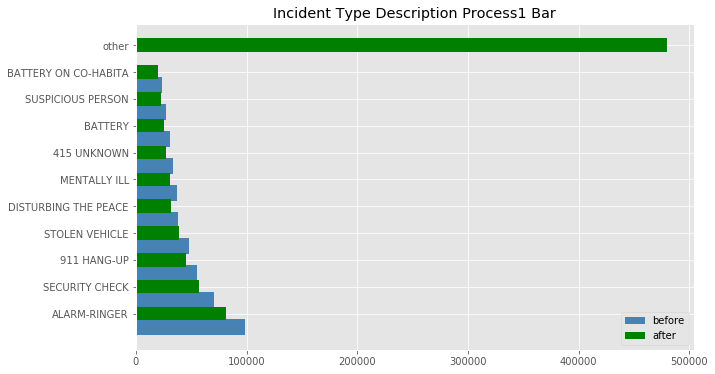

In [22]:
##缺失值处理方法一：将缺失部分剔除
#绘制对比图 
features_lost = ['Beat','Incident Type Description']
for fea in features_lost:
    plt.figure(figsize=(10,6))
    plt.style.use('ggplot')
    fea_c = data[fea].value_counts()
    count = 0
    sum = 0
    show = {}
    for it in fea_c.index:
        count += 1
        if count <= 10:
            show[it] = fea_c[it]
        else:
            sum += 1
    show['other'] = sum
    plt.title(fea+' Process1 Bar')
    bar_1 = list(range(11))
    bar_2 = [i+0.5 for i in bar_1]
    plt.yticks(list(show.values()), list(show.keys()))
    plt.barh(y = bar_1,width = list(show.values()),tick_label = list(show.keys()),
             color = 'steelblue',height = 0.6 ,label = 'before')
    fea_c1 = data1[fea].value_counts()
    show1 = {}
    for it in show.keys():
        if it in fea_c1.index:
            show1[it] = fea_c1[it]
        else:
            show1[it] = 0
    sum = 0;
    for it in fea_c1.index:
        if it not in show.keys():
            sum += fea_c1[it];
    show1['other'] = sum
    plt.barh(y = bar_2,width = list(show1.values()),tick_label = list(show1.keys()),
             color = 'green',height = 0.5,label = 'after')
    plt.legend()
    plt.width = list(show.values())
    plt.show()

In [14]:
##缺失值处理方法二：使用最高频率值填补缺失值
lost_features = ['Area Id','Beat','Closed Time','Incident Type Description']
fill_dict = {}
print("获取每个属性频率最高的值进行填补:")
for fea in lost_features: 
    fea_value = data[fea].value_counts()
    fill_dict[fea] = fea_value.head(1).keys()[0]
print(fill_dict)
data2 = data.fillna(fill_dict)

获取每个属性频率最高的值进行填补:
{'Area Id': 1.0, 'Beat': '04X', 'Closed Time': '2013-02-12T22:52:01.000', 'Incident Type Description': 'ALARM-RINGER'}


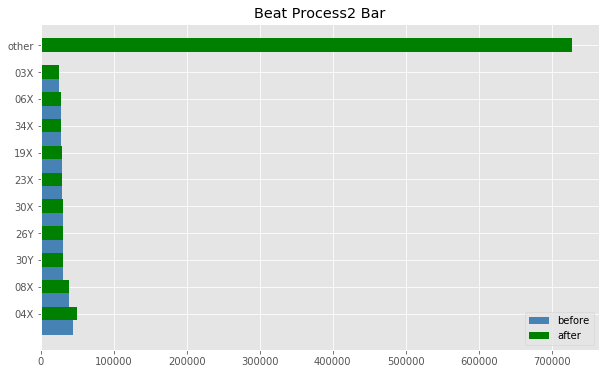

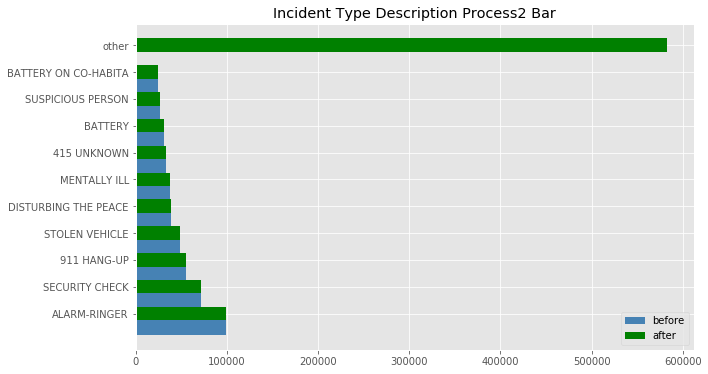

In [23]:
##缺失值处理方法二：使用最高频率值填补缺失值
#绘制对比图 
features_lost = ['Beat','Incident Type Description']
for fea in features_lost:
    plt.figure(figsize=(10,6))
    plt.style.use('ggplot')
    fea_c = data[fea].value_counts()
    count = 0
    sum = 0
    show = {}
    for it in fea_c.index:
        count += 1
        if count <= 10:
            show[it] = fea_c[it]
        else:
            sum += 1
    show['other'] = sum
    plt.title(fea+' Process2 Bar')
    bar_1 = list(range(11))
    bar_2 = [i+0.5 for i in bar_1]
    plt.yticks(list(show.values()), list(show.keys()))
    plt.barh(y = bar_1,width = list(show.values()),tick_label = list(show.keys()),
             color = 'steelblue',height = 0.6 ,label = 'before')
    fea_c1 = data2[fea].value_counts()
    show1 = {}
    for it in show.keys():
        if it in fea_c1.index:
            show1[it] = fea_c1[it]
        else:
            show1[it] = 0
    sum = 0;
    for it in fea_c1.index:
        if it not in show.keys():
            sum += fea_c1[it];
    show1['other'] = sum
    plt.barh(y = bar_2,width = list(show1.values()),tick_label = list(show.keys()),
             color = 'green',height = 0.5 ,label = 'after')
    plt.legend()
    plt.width = list(show.values())
    plt.show()